<a href="https://colab.research.google.com/github/Devashish-23/deep-learning-project-/blob/main/DSDA_SCIT_DL-ProjectCIFAR_10_Object_Recognition_using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
# daatset api
!kaggle competitions download -c cifar-10

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [16]:
!ls

cifar-10-python.tar  sampleSubmission.csv  train.7z
sample_data	     test.7z		   trainLabels.csv


In [17]:
# extracting the compressed Dataset
from zipfile import ZipFile
# The file '/content/cifar-10-python.tar' does not exist.
# The correct zip file downloaded is 'cifar-10.zip'.
dataset = '/content/cifar-10.zip'

try:
  with ZipFile(dataset,'r') as zip_ref: # Renamed 'zip' to 'zip_ref' to avoid conflict with ZipFile module name
    zip_ref.extractall('/content/') # Extract to content directory
    print('The dataset is extracted')
except Exception as e:
  print(f"Error extracting {dataset}: {e}")

Error extracting /content/cifar-10.zip: [Errno 2] No such file or directory: '/content/cifar-10.zip'


In [18]:
!ls

cifar-10-python.tar  sampleSubmission.csv  train.7z
sample_data	     test.7z		   trainLabels.csv


In [19]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.2/494.2 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 18.6 MB/s eta 0:00:00


In [20]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [21]:
!ls

cifar-10-python.tar  sampleSubmission.csv  train     trainLabels.csv
sample_data	     test.7z		   train.7z


Importing the Dependencies

In [22]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [23]:
filenames = os.listdir('/content/train')

In [24]:
type(filenames)

list

In [25]:
len(filenames)

50000

In [26]:
print(filenames[0:5])
print(filenames[-5:])

['25094.png', '4031.png', '13039.png', '25251.png', '3670.png']
['13764.png', '11996.png', '295.png', '23750.png', '33347.png']


**Labels Processing**

In [27]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [28]:
labels_df.shape

(50000, 2)

In [29]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [46]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [31]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [32]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [33]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [34]:
labels_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [35]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [36]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


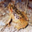

In [37]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

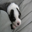

In [38]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [39]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [40]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [41]:
id_list = list(labels_df['id'])

In [42]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [43]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [47]:
type(data)

list

In [48]:
len(data)

50000

In [49]:
type(data[0])

numpy.ndarray

In [50]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
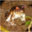

In [51]:
data[0]

In [52]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [53]:
type(X)

numpy.ndarray

In [54]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [56]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [57]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [58]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]], dtype=uint8)
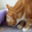

In [59]:
X_train[0]

**Building the Neural Network**

In [60]:
import tensorflow as tf
from tensorflow import keras

In [64]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 6s 3ms/step - loss: 1.9519 - acc: 0.2936 - val_loss: 1.8044 - val_acc: 0.3543
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8166 - acc: 0.3446 - val_loss: 1.7817 - val_acc: 0.3580
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7682 - acc: 0.3666 - val_loss: 1.7463 - val_acc: 0.3728
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7400 - acc: 0.3767 - val_loss: 1.7537 - val_acc: 0.3590
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7232 - acc: 0.3819 - val_loss: 1.7076 - val_acc: 0.3810
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7078 - acc: 0.3871 - val_loss: 1.7245 - val_acc: 0.3728
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.6918 - acc: 0.3950 - val_loss: 1.6794 - val_acc: 0.3875
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

**ResNet50**

In [66]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [67]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [68]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [72]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [71]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ up_sampling2d (UpSampling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [74]:
# Model Complexity
model.build(input_shape=(None, 32, 32, 3))
total_params = model.count_params()
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_weights])
non_trainable_params = np.sum([np.prod(v.shape) for v in model.non_trainable_weights])

print("Total Parameters:", total_params)
print("Trainable Parameters:", trainable_params)
print("Non-Trainable Parameters:", non_trainable_params)

Total Parameters: 40899018
Trainable Parameters: 40583370
Non-Trainable Parameters: 315648


In [76]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 516s 410ms/step - acc: 0.3228 - loss: 2.0456 - val_acc: 0.7763 - val_loss: 0.8012
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 456s 405ms/step - acc: 0.6696 - loss: 1.0580 - val_acc: 0.8870 - val_loss: 0.4380
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 455s 404ms/step - acc: 0.7952 - loss: 0.7577 - val_acc: 0.9265 - val_loss: 0.3395
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 457s 406ms/step - acc: 0.8611 - loss: 0.5761 - val_acc: 0.9285 - val_loss: 0.2791
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 457s 406ms/step - acc: 0.9082 - loss: 0.4404 - val_acc: 0.9348 - val_loss: 0.2394
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 457s 406ms/step - acc: 0.9331 - loss: 0.3472 - val_acc: 0.9427 - val_loss: 0.2186
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 457s 406ms/step - acc: 0.9506 - loss: 0.2858 - val_acc: 0.9430 - val_loss: 0.2077
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 456s 405ms/step - acc: 0.9633 - loss: 0.2296 - val_acc: 0.9430 - val_loss: 0.2054
Epoch 9/

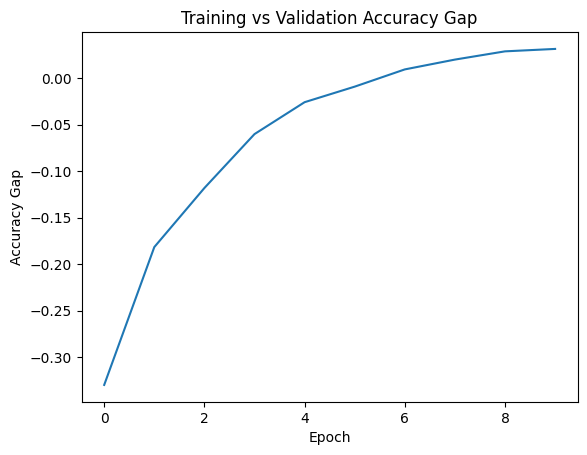

In [78]:
import numpy as np
import matplotlib.pyplot as plt

gap = np.array(history.history['acc']) - np.array(history.history['val_acc'])

plt.plot(gap)
plt.title("Training vs Validation Accuracy Gap")
plt.xlabel("Epoch")
plt.ylabel("Accuracy Gap")
plt.show()

In [79]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 110ms/step - acc: 0.9409 - loss: 0.2216
Test Accuracy = 0.9399999976158142


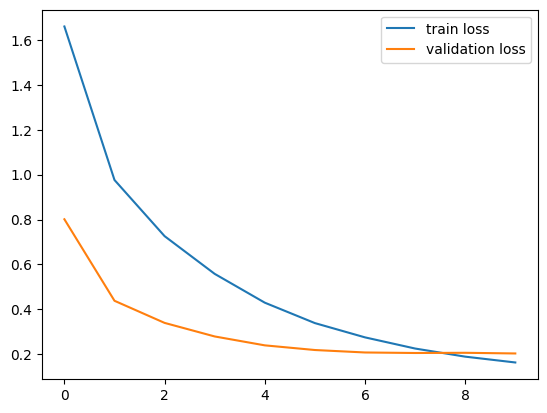

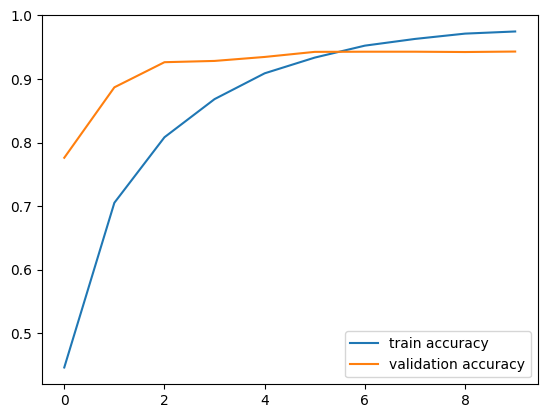

In [80]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [82]:
predictions = model.predict(X_test_scaled)
y_pred = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 112ms/step


In [84]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(Y_test, y_pred)
print("Cohen Kappa Score:", kappa)


Cohen Kappa Score: 0.9333329681461477


In [86]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)


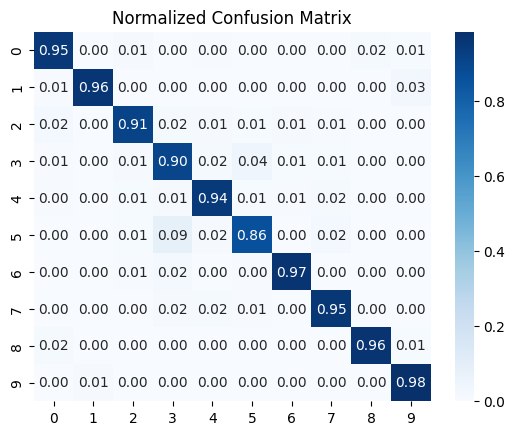

In [88]:
import seaborn as sns

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues")
plt.title("Normalized Confusion Matrix")
plt.show()


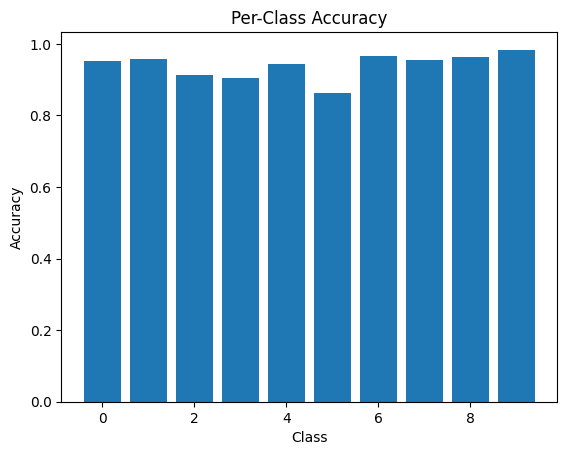

In [89]:
class_accuracy = cm.diagonal() / cm.sum(axis=1)

plt.bar(range(len(class_accuracy)), class_accuracy)
plt.title("Per-Class Accuracy")
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.show()


In [91]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1029
           1       0.98      0.96      0.97       996
           2       0.95      0.91      0.93      1031
           3       0.85      0.90      0.88       982
           4       0.93      0.94      0.94      1008
           5       0.92      0.86      0.89       998
           6       0.96      0.97      0.97       994
           7       0.94      0.95      0.95       998
           8       0.97      0.96      0.97       989
           9       0.95      0.98      0.97       975

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



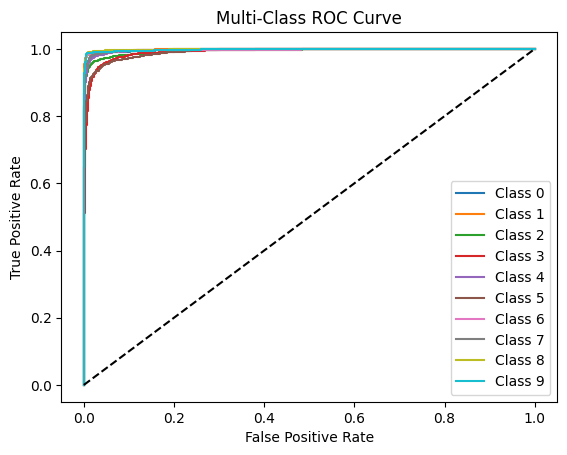

In [93]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve

num_classes = num_of_classes

y_true_bin = label_binarize(Y_test, classes=range(num_classes))

plt.figure()

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], predictions[:, i])
    plt.plot(fpr, tpr, label=f"Class {i}")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


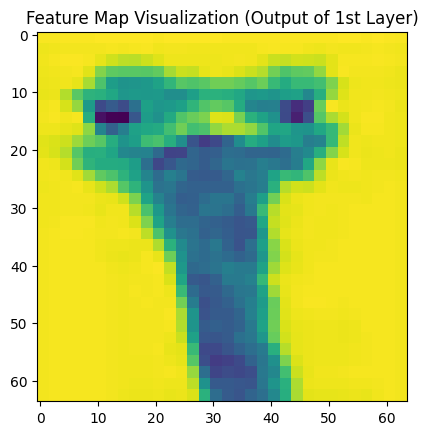

In [98]:
from tensorflow.keras.models import Model
from tensorflow.keras import Input

# Get the input shape from the trained model
input_shape_for_extractor = model.input_shape[1:] # e.g., (32, 32, 3)

# Create a new Input tensor for the feature extraction model
input_for_feature_extractor = Input(shape=input_shape_for_extractor)

# Chain the first 5 layers of the original model to this new input
x = input_for_feature_extractor
extracted_outputs = []
for layer in model.layers[:5]:
    x = layer(x)
    extracted_outputs.append(x) # Collect output of each layer

# Create the activation model using the new input and the collected outputs
activation_model = Model(inputs=input_for_feature_extractor, outputs=extracted_outputs)

# Use a sample image from X_test_scaled and reshape to (1, 32, 32, 3)
sample_image = X_test_scaled[0].reshape(1, 32, 32, 3)

activations = activation_model.predict(sample_image)

# Visualize the feature map from the first layer's output (index 0 in extracted_outputs)
# The original code asked for activations[0][0,:,:,0], which corresponds to the first UpSampling2D layer's output.
plt.imshow(activations[0][0,:,:,0], cmap='viridis')
plt.title("Feature Map Visualization (Output of 1st Layer)")
plt.show()

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras import Input

# Get the input shape from the trained model
input_shape_for_extractor = model.input_shape[1:]

# Create a new Input tensor for the feature extraction model
input_tensor = Input(shape=input_shape_for_extractor)

# Chain the input tensor through the layers up to the desired one (index 1)
x = input_tensor
x = model.layers[0](x) # Output of first UpSampling2D layer (index 0)
output_of_layer_1 = model.layers[1](x) # Output of second UpSampling2D layer (index 1)

# Create the feature model
feature_model = Model(inputs=input_tensor, outputs=output_of_layer_1)


The feature map visualization of the first convolutional layer demonstrates that the network extracts low-level spatial features such as edges and contours. High activation regions correspond to prominent structural patterns within the object, indicating effective early-stage feature extraction.

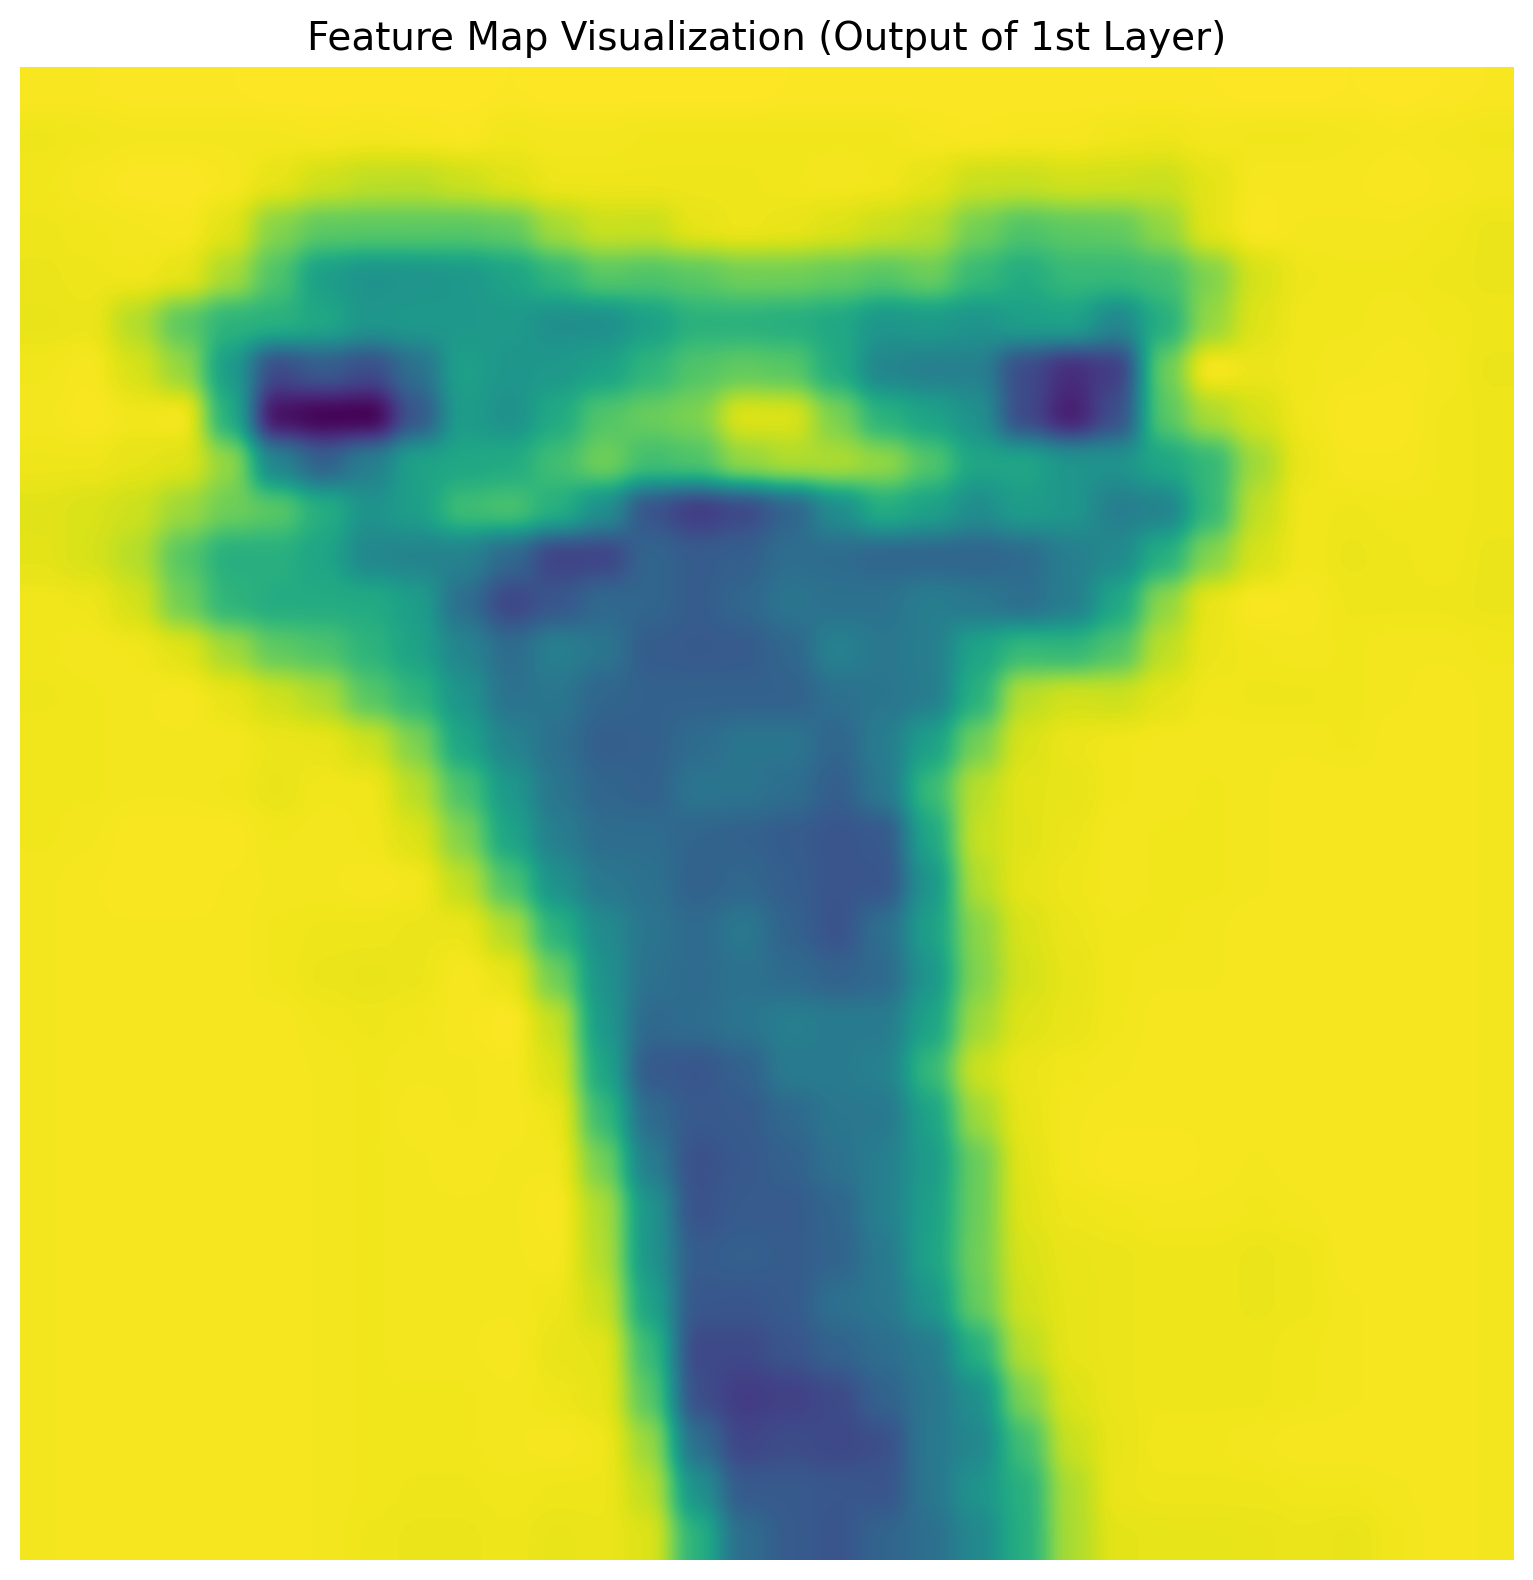

In [100]:
plt.figure(figsize=(8,8), dpi=200)  # Bigger size + higher DPI

plt.imshow(activations[0][0,:,:,0],
           cmap='viridis',
           interpolation='bicubic')  # Smooth scaling

plt.title("Feature Map Visualization (Output of 1st Layer)", fontsize=14)
plt.axis('off')  # Remove axis for clean look

plt.tight_layout()
plt.show()


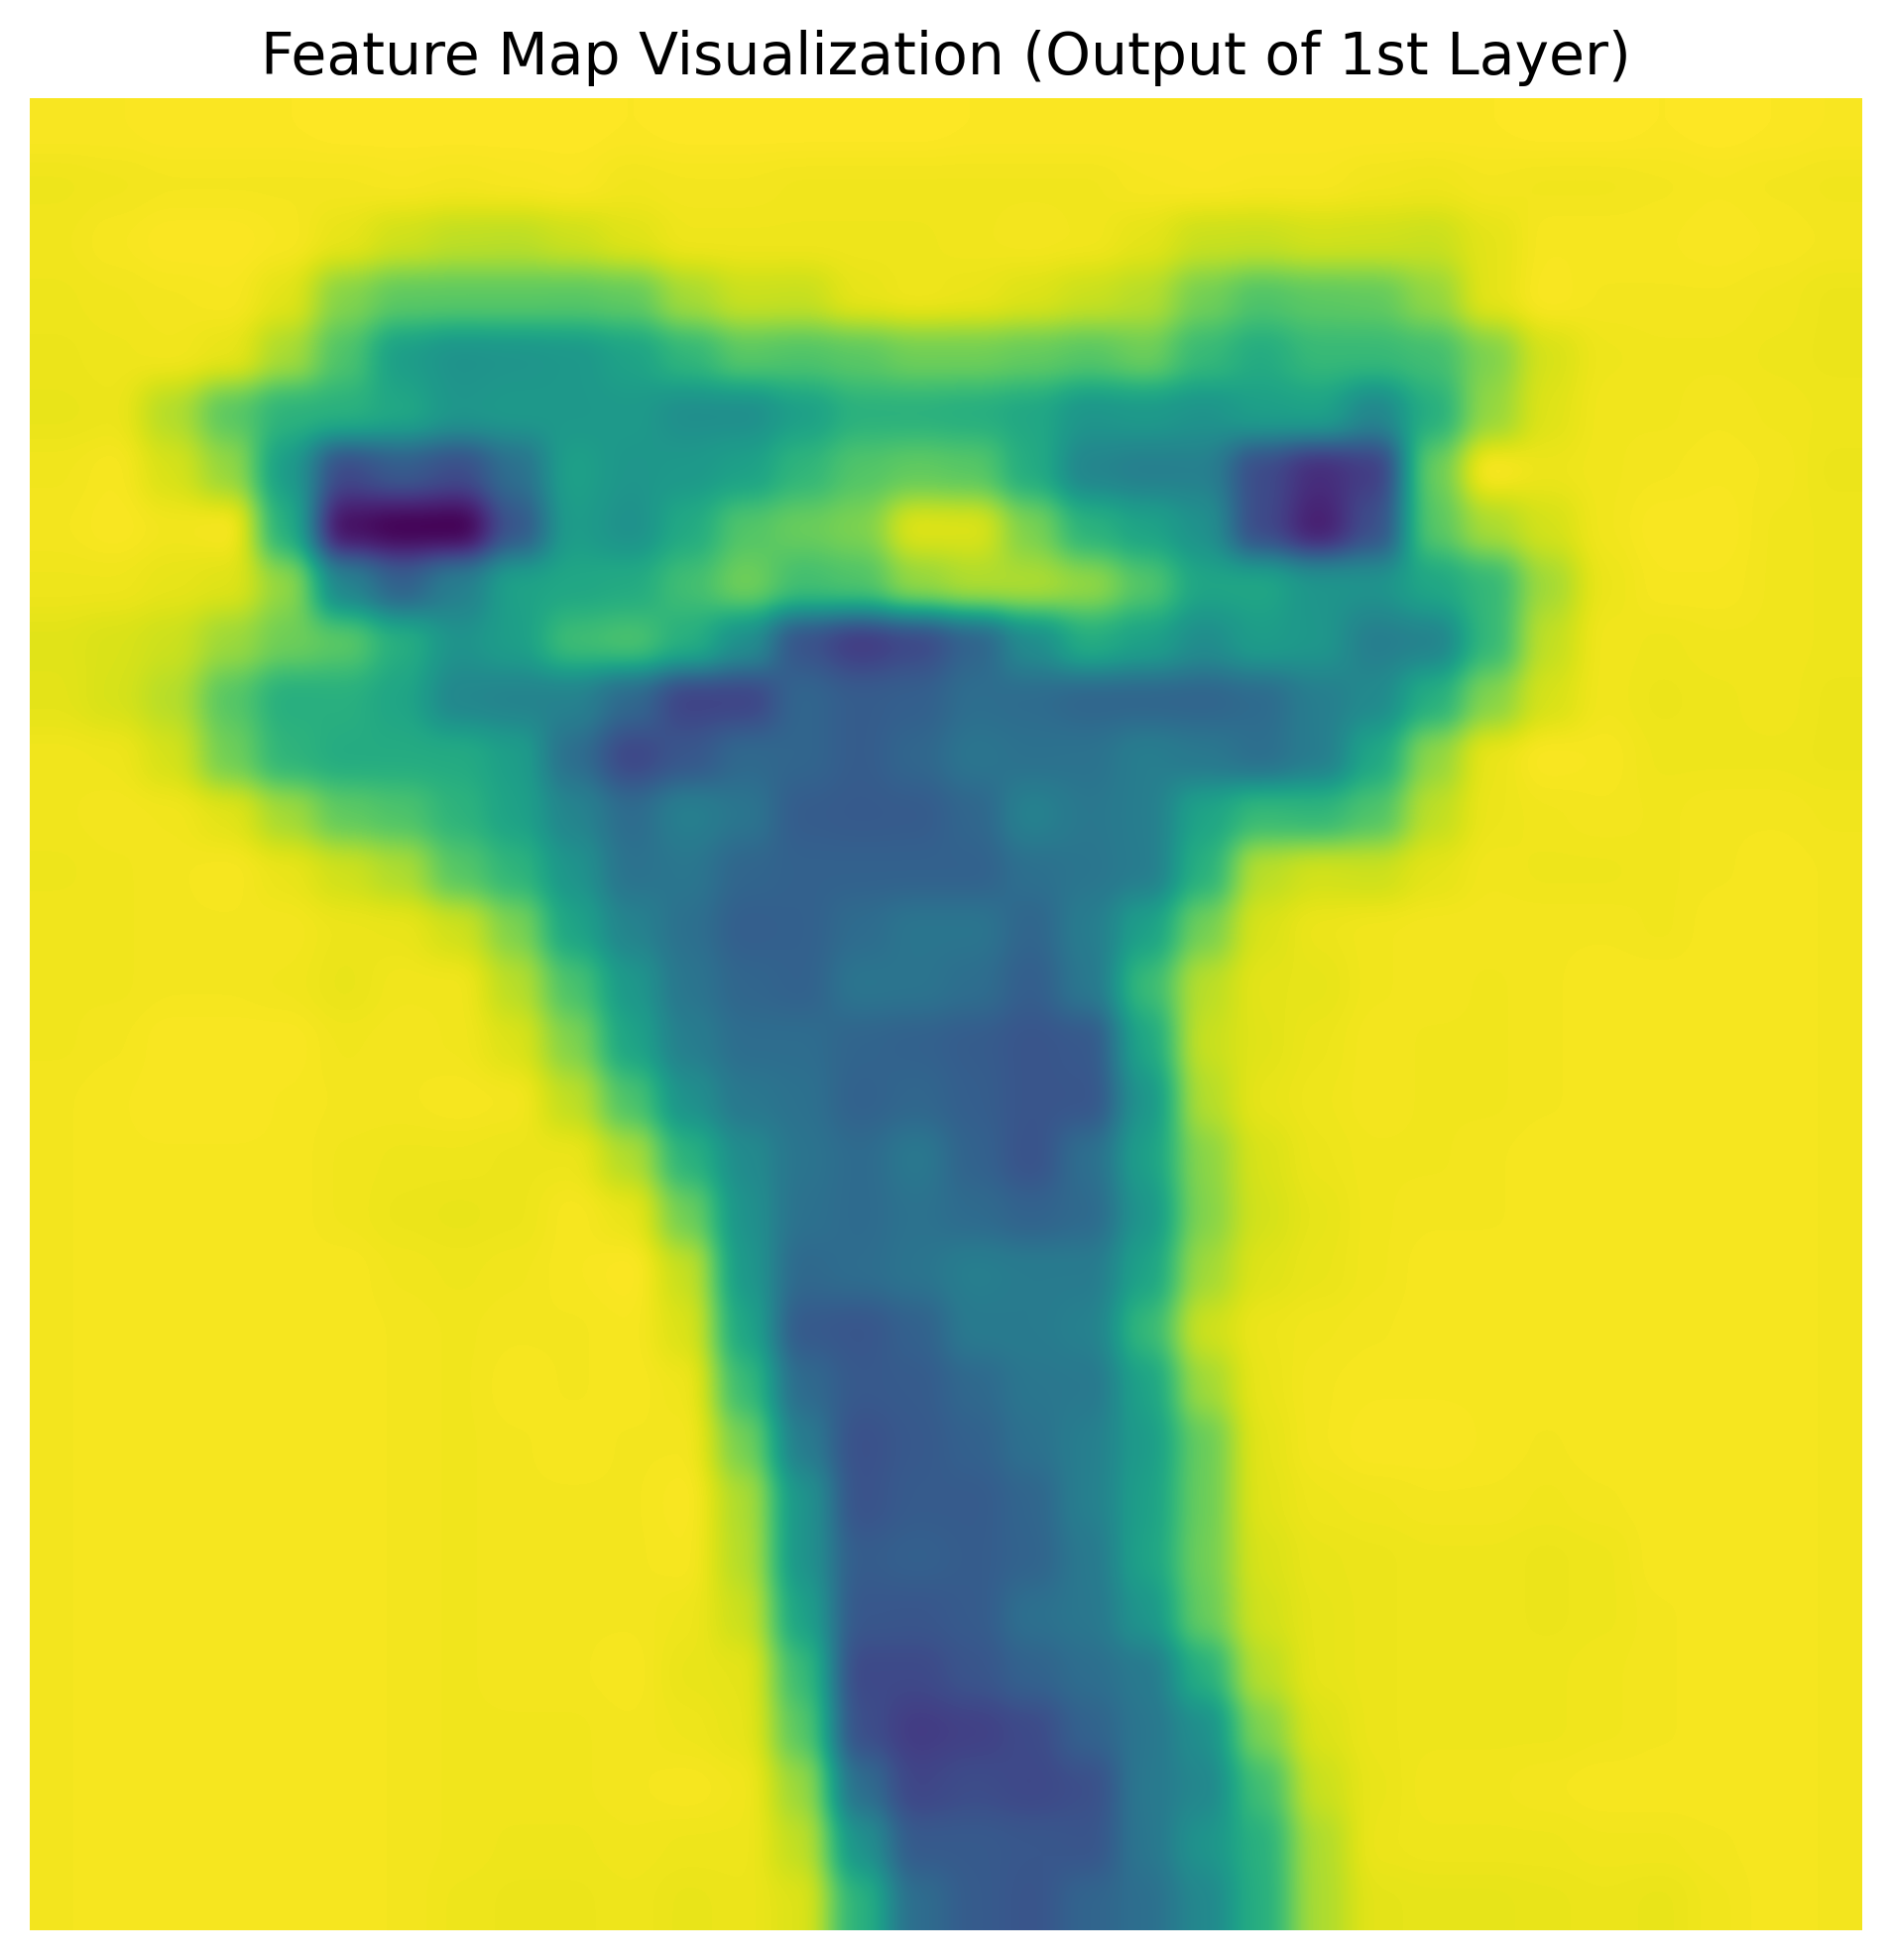

In [101]:
plt.figure(figsize=(8,8), dpi=300)

plt.imshow(activations[0][0,:,:,0],
           cmap='viridis',
           interpolation='bicubic')

plt.title("Feature Map Visualization (Output of 1st Layer)", fontsize=14)
plt.axis('off')

plt.savefig("feature_map_high_quality.png", dpi=300, bbox_inches='tight')
plt.show()


In [99]:
misclassified = np.sum(Y_test != y_pred)
total = len(y_pred)

print("Misclassification Rate:", misclassified/total)


Misclassification Rate: 0.06


6% of the test samples were classified incorrectly

94% were classified correctly




If this is from ResNet50, then:

Model is learning properly

No major overfitting (assuming validation accuracy is similar)

Strong classification performance